## Preprocessing

In [27]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import lightgbm as lgb
from lightgbm import LGBMClassifier
import shap
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_validate

In [29]:
df = pd.read_csv('./data/final/01_phylum_dedornot_ra.csv')

In [30]:
df.head()

,Index,Patient=1,Acidobacteria,Actinobacteria,Armatimonadetes_unclassified,Bacteroidetes,Chlamydiae,Chloroflexi,Cyanobacteria,DeinococcusThermus,...,Synergistetes,Tenericutes,Thermotogae,Verrucomicrobia,Gender 1=F,Age,Lenses (Y_N),Antibiotics (B_A),OSDI score,DEQ5 score
0,P1,1,0.0,0.172532,0.0,0.143556,0.0,0.0,0.03493,0.051336,...,0.0,0.0,0.0,0.000000,1,65,0,0,NaN,NaN
1,P2,1,0.0,0.705676,0.0,0.010717,0.0,0.0,0.00000,0.000000,...,0.0,0.0,0.0,0.000000,1,67,0,0,31.25,17.0
2,P3,1,0.0,0.146592,0.0,0.048312,0.0,0.0,0.00000,0.000000,...,0.0,0.0,0.0,0.032032,1,33,0,0,33.30,16.0
3,P4,1,0.0,0.142101,0.0,0.029968,0.0,0.0,0.00000,0.013363,...,0.0,0.0,0.0,0.000000,1,66,0,0,93.75,21.0
4,P5,1,0.0,0.443562,0.0,0.079860,0.0,0.0,0.00000,0.000000,...,0.0,0.0,0.0,0.000000,0,69,0,0,6.25,7.0


In [31]:
df.iloc[:,2:26]

,Acidobacteria,Actinobacteria,Armatimonadetes_unclassified,Bacteroidetes,Chlamydiae,Chloroflexi,Cyanobacteria,DeinococcusThermus,Elusimicrobia,Euryarchaeota,...,NA,Nitrospirae,Parcubacteria_unclassified,Proteobacteria,Saccharibacteria_unclassified,Spirochaetae,Synergistetes,Tenericutes,Thermotogae,Verrucomicrobia
0,0.0,0.172532,0.0,0.143556,0.0,0.0,0.034930,0.051336,0.054379,0.000000,...,0.0,0.0,0.0,0.249735,0.0,0.000000,0.0,0.0,0.0,0.000000
1,0.0,0.705676,0.0,0.010717,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.055438,0.0,0.000000,0.0,0.0,0.0,0.000000
2,0.0,0.146592,0.0,0.048312,0.0,0.0,0.000000,0.000000,0.000000,0.011846,...,0.0,0.0,0.0,0.179285,0.0,0.000000,0.0,0.0,0.0,0.032032
3,0.0,0.142101,0.0,0.029968,0.0,0.0,0.000000,0.013363,0.000000,0.000000,...,0.0,0.0,0.0,0.387404,0.0,0.000000,0.0,0.0,0.0,0.000000
4,0.0,0.443562,0.0,0.079860,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.175069,0.0,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.0,0.642054,0.0,0.020378,0.0,0.0,0.010520,0.003771,0.000000,0.000000,...,0.0,0.0,0.0,0.136297,0.0,0.003573,0.0,0.0,0.0,0.000000
87,0.0,0.487164,0.0,0.000529,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.025473,0.0,0.000000,0.0,0.0,0.0,0.000000
88,0.0,0.282840,0.0,0.004963,0.0,0.0,0.000662,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.655681,0.0,0.000000,0.0,0.0,0.0,0.000000
89,0.0,0.623379,0.0,0.003969,0.0,0.0,0.000066,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.009196,0.0,0.000000,0.0,0.0,0.0,0.000000


In [32]:
df.iloc[:,1]

0     1
1     1
2     1
3     1
4     1
     ..
86    0
87    0
88    0
89    0
90    0
Name: Patient=1, Length: 91, dtype: int64

In [33]:
X = df.iloc[:,2:26]
y = df.iloc[:,1]

## Cross validate with leave one out and explain according to average of estimators

### XGBoost

In [34]:
clfxgb = XGBClassifier(random_state=42)
looxgb = LeaveOneOut()
xgb_scores = cross_validate(clfxgb, X, y, cv=looxgb, scoring='accuracy', return_estimator=True)


In [35]:
xgb_scores['test_score']

array([1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1.])

In [36]:
print(f'Accuracy XGB: ', np.mean(xgb_scores['test_score']))

Accuracy XGB:  0.6483516483516484


In [37]:
feature_importances_complete = []

for idx, estimator in enumerate(xgb_scores['estimator']):
    #print(f'The most important features for estimator {idx}:')
    feature_importances = pd.DataFrame(estimator.feature_importances_,
                                       index=X.columns,
                                       columns=['Importance']).sort_values('Importance', ascending=False)
    #print(feature_importances)
    feature_importances_complete.append(feature_importances)

feature_importances_complete = pd.concat(feature_importances_complete)

In [38]:
feature_importances_complete.shape

(2184, 1)

In [39]:
fic = feature_importances_complete.groupby(level=0).mean().sort_values('Importance', ascending=False)

In [40]:
fic[:15]

,Importance
Fusobacteria,0.233774
Cyanobacteria,0.135389
DeinococcusThermus,0.134977
Bacteroidetes,0.132338
Proteobacteria,0.120315
Firmicutes,0.103620
Actinobacteria,0.086990
Verrucomicrobia,0.052598
Nitrospirae,0.000000
Thermotogae,0.000000


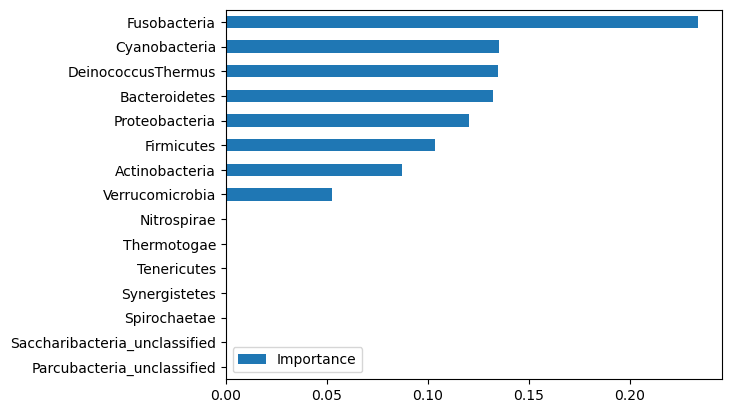

In [41]:
plot_fic = fic[:15]
plot_fic.plot(kind='barh').invert_yaxis()

In [ ]:
for estimator in xgb_scores['estimator']:
    explainerxgb = shap.Explainer(estimator, X)
    shap_valuesxgb = explainerxgb.shap_values(X)

In [43]:
np.shape(shap_valuesxgb)

(91, 24)

In [44]:
shap_valuesxgb_mean = np.mean(shap_valuesxgb, axis=0, keepdims=True)

In [45]:
np.shape(shap_valuesxgb_mean)

(1, 24)

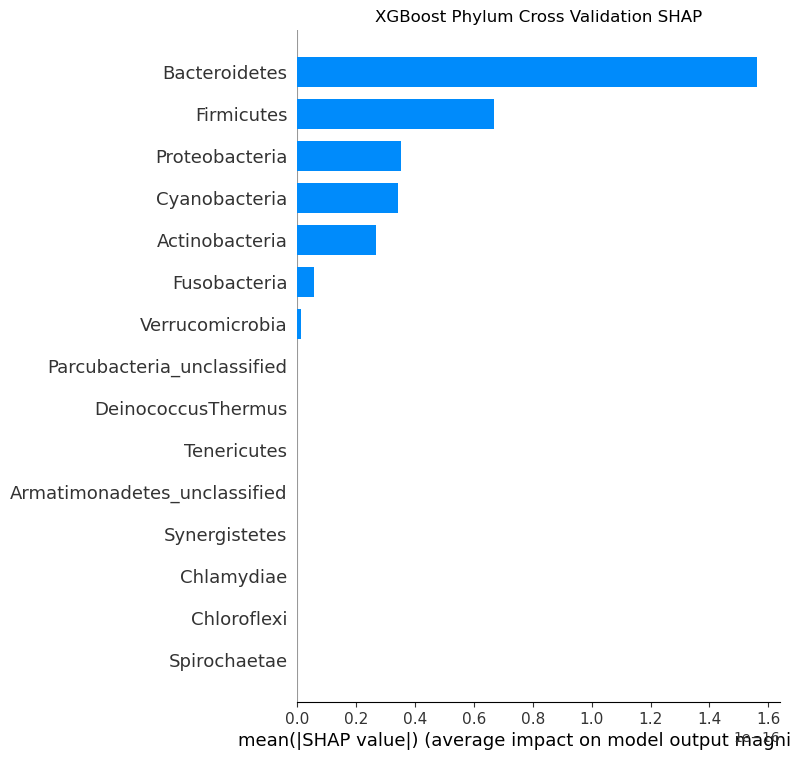

In [46]:
shap.summary_plot(shap_valuesxgb_mean, X, plot_type='bar', max_display=15, show=False)
plt.title('XGBoost Phylum Cross Validation SHAP')
plt.show()

### LightGBM

In [ ]:
clflgbm = LGBMClassifier(random_state=42)
loolgbm = LeaveOneOut()
lgbm_scores = cross_validate(clflgbm, X, y, cv=loolgbm, scoring='accuracy', verbose=False, return_estimator=True)

In [48]:
lgbm_scores['test_score']

array([1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 1.])

In [49]:
print(f'Accuracy LGBM: ', np.mean(lgbm_scores['test_score']))

Accuracy LGBM:  0.6593406593406593


In [50]:
feature_importances_complete_lgb = []

for idx, estimator in enumerate(lgbm_scores['estimator']):
    #print(f'The most important features for estimator {idx}:')
    feature_importances_lgb = pd.DataFrame(estimator.feature_importances_,
                                       index=X.columns,
                                       columns=['Importance']).sort_values('Importance', ascending=False)
    #print(feature_importances_lgb)
    feature_importances_complete_lgb.append(feature_importances_lgb)

feature_importances_complete_lgb = pd.concat(feature_importances_complete_lgb)

In [51]:
fic_lgb = feature_importances_complete_lgb.groupby(level=0).mean().sort_values('Importance', ascending=False)

In [52]:
fic_lgb[:15]

,Importance
Bacteroidetes,89.593407
Proteobacteria,66.978022
Cyanobacteria,41.307692
Firmicutes,34.901099
Actinobacteria,33.362637
Acidobacteria,0.000000
NA,0.000000
Thermotogae,0.000000
Tenericutes,0.000000
Synergistetes,0.000000


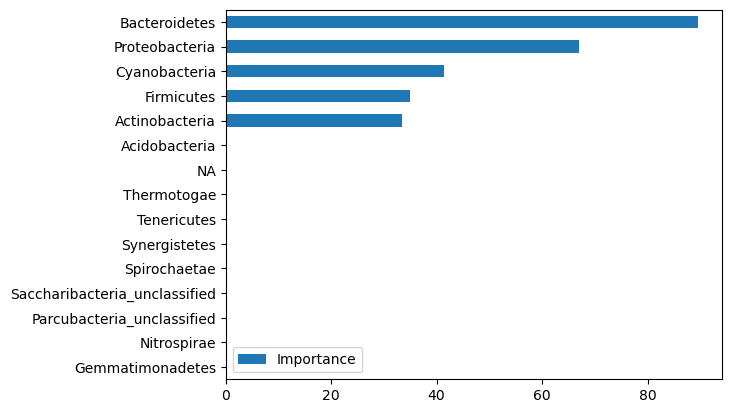

In [53]:
plot_fic_lgb = fic_lgb[:15]
plot_fic_lgb.plot(kind='barh').invert_yaxis()

In [54]:
for estimator in lgbm_scores['estimator']:
    explainerlgb = shap.Explainer(estimator, X)
    shap_valueslgb = explainerlgb.shap_values(X)    
    

In [55]:
np.shape(shap_valueslgb)

(91, 24)

In [56]:
shap_valueslgb_mean = np.mean(shap_valueslgb, axis=0, keepdims=True)

In [57]:
np.shape(shap_valueslgb_mean)

(1, 24)

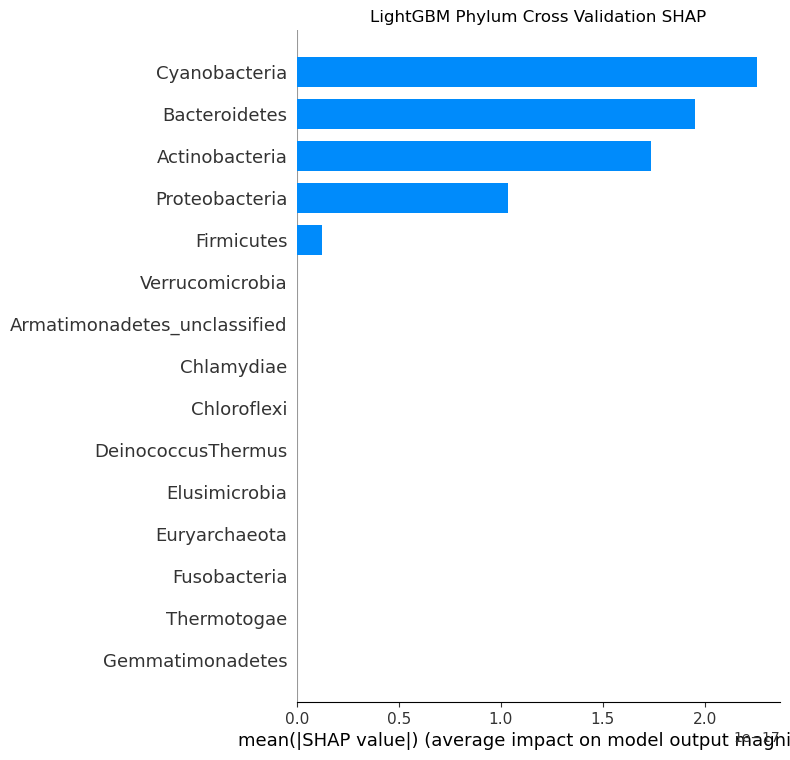

In [58]:
shap.summary_plot(shap_valueslgb_mean, X, plot_type='bar', max_display=15, show=False)
plt.title('LightGBM Phylum Cross Validation SHAP')
plt.show()

### Multilayer perceptron 

In [59]:
from sklearn.neural_network import MLPClassifier
clfmlp = MLPClassifier(solver="adam", activation="relu", learning_rate="constant", random_state=42, max_iter=30000, verbose=False)
clfmlp.out_activation_="softmax"

loomlp = LeaveOneOut()
mlp_scores = cross_validate(clfmlp, X, y, cv=loomlp, scoring='accuracy', return_estimator=True)

In [60]:
mlp_scores['test_score']

array([1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0.])

In [61]:
print(f'Accuracy MLP: ', np.mean(mlp_scores['test_score']))

Accuracy MLP:  0.5934065934065934


In [62]:
# Every estimator in mlp_scores need to be fitted and permutation importance run on each estimator.
MLP_feature_importances_complete = []

for idx, estimator in enumerate(mlp_scores['estimator']):
    mlpimportance = estimator.fit(X, y)
    result = permutation_importance(mlpimportance,X, y,n_repeats=20, random_state = 42)
    MLPfeatures = pd.DataFrame(mlpimportance.feature_names_in_,columns=['Features'])
    MLPfeatures['Importance'] = result.importances_mean.tolist()
    #Sort by importance
    MLPfeatures = MLPfeatures.sort_values(by = 'Importance',ascending=False)
    #print(f'The most important features for estimator {idx}:')
    #print(MLPfeatures)
    MLP_feature_importances_complete.append(MLPfeatures)

MLP_feature_importances_complete = pd.concat(MLP_feature_importances_complete)

In [63]:
MLPfeatures.shape

(24, 2)

In [64]:
MLP_feature_importances_complete.shape

(2184, 2)

In [65]:
fic_mlp = MLP_feature_importances_complete.groupby('Features').mean().sort_values('Importance', ascending=False)

In [66]:
fic_mlp.shape

(24, 1)

In [67]:
fic_mlp[:15]

,Importance
Features,
Firmicutes,0.124725
Actinobacteria,0.120879
Proteobacteria,0.033516
Cyanobacteria,0.031868
Fusobacteria,0.008242
Verrucomicrobia,0.004945
Elusimicrobia,0.002198
Tenericutes,0.002198
Synergistetes,0.001099


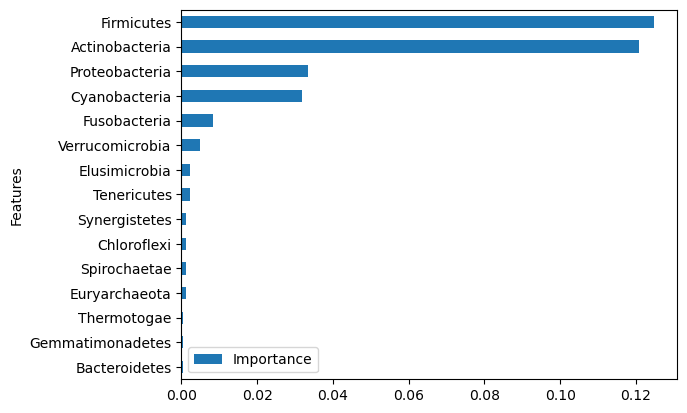

In [68]:
plot_fic_mlp = fic_mlp[:15]
plot_fic_mlp.plot(kind='barh').invert_yaxis()

In [69]:
for estimator in mlp_scores['estimator']:
    explainermlp = shap.Explainer(mlpimportance.predict, X)
    shap_valuesmlp = explainermlp.shap_values(X)

In [70]:
np.shape(shap_valuesmlp)

(91, 24)

In [71]:
shap_valuesmlp_mean = np.mean(shap_valuesmlp, axis=0, keepdims=True)

In [72]:
np.shape(shap_valuesmlp_mean)

(1, 24)

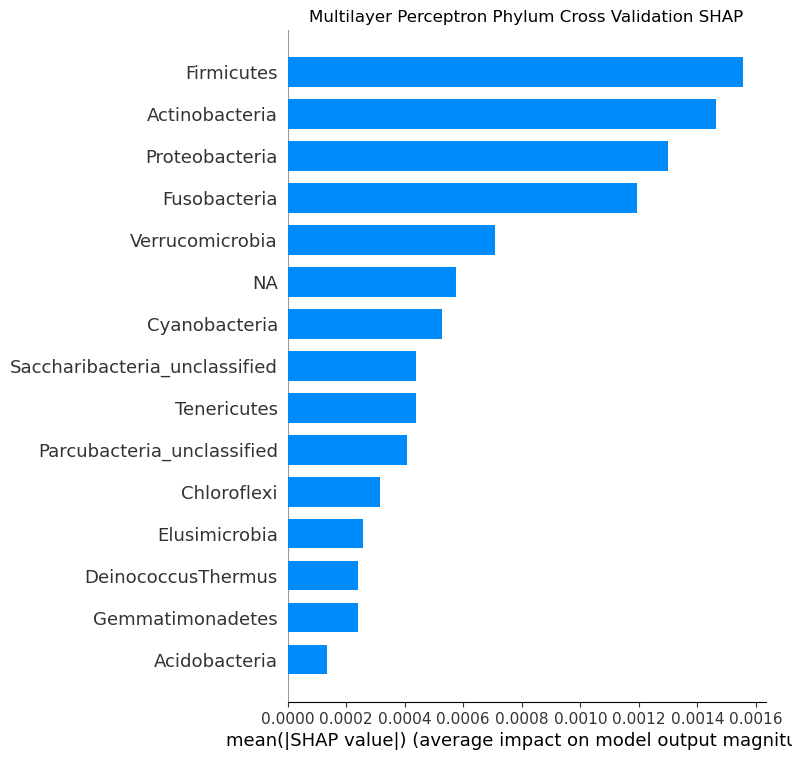

In [73]:
shap.summary_plot(shap_valuesmlp_mean, X, plot_type='bar', max_display=15, show=False)
plt.title('Multilayer Perceptron Phylum Cross Validation SHAP')
plt.show()